<h1>Delta Learning Rule</h1>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Lab 7 ML Dataset - Delta Rule.xlsx")
df.columns =df.iloc[1]
df=df.iloc[2:7]
print(df)
z=df['X']
x=np.array(df['X'])
y=np.array(df['Y'])
print(x)
#x = pd.Series(x)
#y = pd.Series(y)

1  X  Y
2  1  1
3  2  3
4  4  3
5  3  2
6  5  5
[1 2 4 3 5]


In [ ]:
x_2D=x.reshape(-1,1)
y_2D=y.reshape(-1,1)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_2D,y_2D)
print(reg.intercept_)
print(reg.coef_)

[0.4]
[[0.8]]


[1 2 4 3 5]
[[1.2000000000000002]
 [2.0]
 [3.6]
 [2.8000000000000003]
 [4.4]]


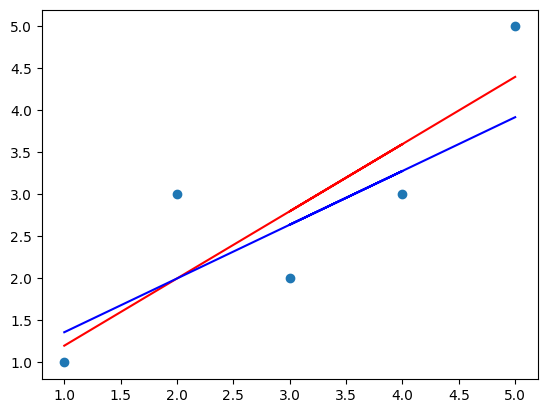

In [ ]:
print(x)
y_predict=0.4+0.8*x_2D
print(y_predict)
plt.scatter(x,y)
plt.plot(x,reg.predict(x_2D),color='red')
plt.plot(x,reg.predict(y_predict),color='blue')

In [ ]:
m=0.8
b=0.4
loss_slop=-2*np.sum(y-m*x_2D.ravel()-b)
print(loss_slop)
lr=0.1
st=loss_slop*lr
b=b-st
print(b)
y_predict2=(m*x_2D+b).reshape(5)

1.5543122344752192e-15
0.39999999999999986


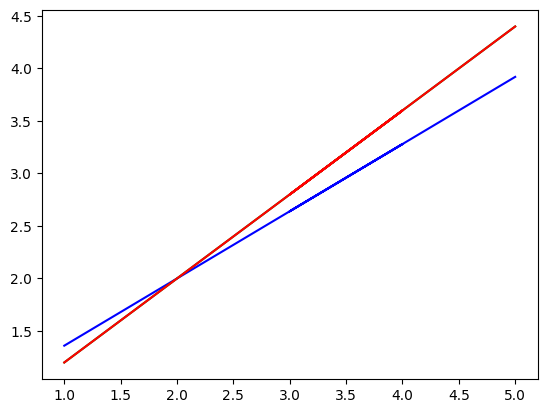

In [ ]:
plt.plot(x,reg.predict(y_predict),color='blue')
plt.plot(x,reg.predict(x_2D),color='green')
plt.plot(x,y_predict2,color='red')

In [ ]:
loss_slop=-2*np.sum(y-m*x_2D.ravel()-b)
print(loss_slop)
lr=0.1
st=loss_slop*lr
b=b-st
print(b)
y_predict3=(m*x_2D+b).reshape(5)

4.440892098500626e-16
0.3999999999999998


DELTA RULE

Final w0: 0.3999129332130415
Final w1: 0.8000241161038671


'\n\nprint(reg.intercept_) ==> 0.4 (w0)\nprint(reg.coef_)  ==> 0.8(w1)\n\n'

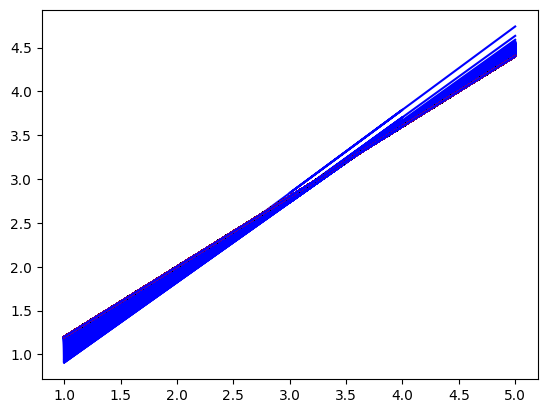

In [ ]:
w0 = 0
w1 = 1
learning_rate = 0.01
num_iterations = 1000

for _ in range(num_iterations):
    deltaw0 = 0
    deltaw1 = 0

    for index, row in df.iterrows():
        x_label = row['X']
        y_actual = row['Y']
        o = w0 + w1 * x_label

        deltaw0 += learning_rate * (y_actual - o)
        deltaw1 += learning_rate * (y_actual - o) * x_label

    w0 += deltaw0
    w1 += deltaw1
    a=(w0+w1*x_2D).reshape(5)
    plt.plot(x,reg.predict(x_2D),color='red')
    plt.plot(x,a,color='blue')

# Print the final values of w0 and w1 after training
print("Final w0:", w0)
print("Final w1:", w1)

In [ ]:
y_pre=[]
for i in x:
  y=w0+w1*i
  y_pre.append(y)
print(y_pre)

[1.1999370493169086, 1.9999611654207758, 3.60000939762851, 2.799985281524643, 4.400033513732377]


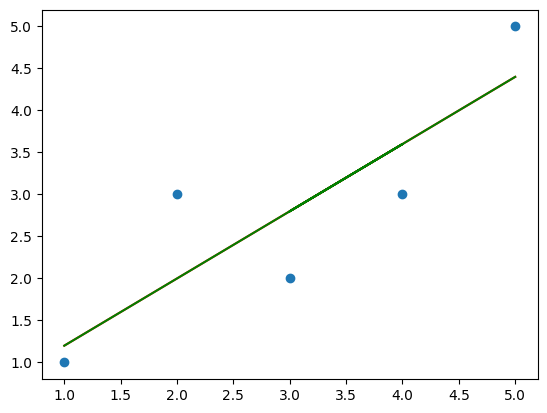

In [ ]:
x=np.array(df['X'])
y=np.array(df['Y'])
plt.scatter(x,y)
plt.plot(x,reg.predict(x_2D),color='red')
plt.plot(x,y_pre,color='green')

MEAN SQUERE ERROR

In [ ]:
sum=0
for i in range(len(y_pre)):
  sum+=(y_pre[i]-y[i])**2
MSE=sum/len(y_pre)
print("mean square erro :",MSE)
RMSE =MSE**0.5
#print("root mean square erro :",RMSE)

mean square erro : 0.4800000013798066
